# Finding Odd Radio Circle using PyBDSF 

This project demonstrate circular object detection using PyBDSF library.


In [3]:
import pickle
from multiprocessing import Pool
from glob import glob
from collections import Counter
from astropy.utils.data import get_pkg_data_filename
import pyink as pu

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
from tqdm import tqdm as tqdm
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from reproject import reproject_interp

In [4]:
import bdsf
import math


Pybdsf library must be used with FITS images. 
Images used in this project are FITS images from EMU survey. 

In [5]:
file1= get_pkg_data_filename('image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fits')


The area of the object is calculated based on the object being detected (i.e ORCs). Here the radius of the object is approximately 1arcminute in diameter which are around 20-40 radius in pixels in the FITS image.

In [6]:
#area of circlde (island)

min_area =int(math.pi * (20 ** 2))
max_area =int(math.pi * (40 ** 2))

print(min_area,max_area)

1256 5026


# Testing Preprocessing


When searching for ORCs, the default paramters will not be able to detect ORCs. As a preprocessing measure, following thresh_isl and thresh_pix must be lowered. (https://pybdsf.readthedocs.io/en/latest/process_image.html#term-thresh_pix)

Lowering the thresh_isl will produce larger island for grouping. when the default parametr of 3 sigma above the mean was used, it was breaking the ORCs into smaller islands.

For ORCs detection thresh_isl = 1.5 to 2.0 and thresh_pix = 5.0 - 4.0 worked the best for preprocessing

In [ ]:
img = bdsf.process_image(file1, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
img2_4 = bdsf.process_image(file1, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
img2 = bdsf.process_image(file1, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
img3 = bdsf.process_image(file1, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 1.5,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
img4 = bdsf.process_image(file1, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 1.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

export result files

In [11]:
img.export_image(outfile = 'image_thresh3.fits',clobber="True",img_type='island_mask')
img2_4.export_image(outfile = 'image_thresh2_4.fits',clobber="True",img_type='island_mask')
img2.export_image(outfile = 'image_thresh2.fits',clobber="True",img_type='island_mask')
img3.export_image(outfile = 'image_thresh1.5.fits',clobber="True",img_type='island_mask')
img4.export_image(outfile = 'image_thresh1_4.fits',clobber="True",img_type='island_mask')


--> Wrote file 'image_thresh3.fits'
--> Wrote file 'image_thresh2_4.fits'
--> Wrote file 'image_thresh2.fits'
--> Wrote file 'image_thresh1.5.fits'
--> Wrote file 'image_thresh1_4.fits'


True

# Applying search parameter on images

In [4]:
file1= get_pkg_data_filename('image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fits')
file2= get_pkg_data_filename('image.i.EMU_1315+00B.SB64249.cont.taylor.0.highres.restored.conv.fits')
file3= get_pkg_data_filename('image.i.EMU_1315+00B.SB64249.cont.taylor.0.restored.conv.fits')
file4= get_pkg_data_filename('image.i.EMU_1315+00B.SB64249.cont.taylor.0.restored.raw.fits')
file5= get_pkg_data_filename('image.i.EMU_2115-60.SB54944.cont.taylor.0.highres.restored.conv.fits')
file6= get_pkg_data_filename('image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.conv.fits')

In [ ]:
raw_54944_ = bdsf.process_image(file1, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
highres_64249 = bdsf.process_image(file2, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
conv_64249 = bdsf.process_image(file3, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
raw_64249 = bdsf.process_image(file4, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
highres_54944 = bdsf.process_image(file5, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

In [ ]:
conv_54944 = bdsf.process_image(file6, 
                        group_by_isl='True',
                        shapelet_do = 'True',
                        thresh_isl= 2.0,
                        thresh_pix=4,
                        minpix_isl= min_area,
                        maxpix_isl=max_area
                        )

export result images

In [11]:
raw_54944_.export_image(outfile = 'raw_54944.fits',clobber="True",img_type='island_mask')
highres_64249.export_image(outfile = 'highres_64249.fits',clobber="True",img_type='island_mask')
conv_64249.export_image(outfile = 'conv_64249.fits',clobber="True",img_type='island_mask')
raw_64249.export_image(outfile = 'raw_64249.fits',clobber="True",img_type='island_mask')
highres_54944.export_image(outfile = 'highres_54944.fits',clobber="True",img_type='island_mask')
conv_54944.export_image(outfile = 'conv_54944.fits',clobber="True",img_type='island_mask')


--> Wrote file 'raw_54944.fits'
--> Wrote file 'highres_64249.fits'
--> Wrote file 'conv_64249.fits'
--> Wrote file 'raw_64249.fits'
--> Wrote file 'highres_54944.fits'
--> Wrote file 'conv_54944.fits'


True

# Exporting catalog

PyBDSF writes catalog of each detected source which can be exported for further use. full list of catalog variable -> https://pybdsf.readthedocs.io/en/latest/write_catalog.html

In [12]:
raw_54944_.write_catalog(format='csv',catalog_type='srl', outfile='raw_54944.csv', clobber="True")
highres_64249.write_catalog(format='csv',catalog_type='srl', outfile='highres_64249.csv', clobber="True")
conv_64249.write_catalog(format='csv',catalog_type='srl', outfile='conv_64249.csv', clobber="True")
raw_64249.write_catalog(format='csv',catalog_type='srl', outfile='raw_64249.csv', clobber="True")
highres_54944.write_catalog(format='csv',catalog_type='srl', outfile='highres_54944.csv', clobber="True")
conv_54944.write_catalog(format='csv',catalog_type='srl', outfile='conv_54944.csv', clobber="True")

--> Wrote ASCII file 'raw_54944.csv'
--> Wrote ASCII file 'highres_64249.csv'
--> Wrote ASCII file 'conv_64249.csv'
--> Wrote ASCII file 'raw_64249.csv'
--> Wrote ASCII file 'highres_54944.csv'
--> Wrote ASCII file 'conv_54944.csv'


True

# Circle Detection

As pyBDSF does not have function specifically to detect circular objects, this will be done manually using the exported catalog. 

Maj: the FWHM of the major axis of the source, in degrees \

Min: the FWHM of the minor axis of the source, in degrees \

The circularity of the object are identified by getting the ratio of Min/Maj. If its ratio is closer to 1 it is likely to be a circular in shape.

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle
import pandas as pd

##  SB54944.raw

In [3]:
cat = pd.read_csv("raw_54944.csv", skiprows = 5) #image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fit
cat.columns = cat.columns.str.strip()

Here the ratio threshold have been set to greater than 0.6

In [13]:
circular_pos = cat["Min"]/cat["Maj"] > 0.6 #get index of island where ratio is greater than 0.6
circular_catalog = cat[circular_pos]
print(circular_catalog.shape)

(15, 45)


In [14]:
RA = circular_catalog["RA"] #get right ascension of circular object
DEC =circular_catalog["DEC"] #get declination of circular object
print(RA, DEC)

3     324.800455
4     324.586927
17    323.308150
22    322.097738
25    322.144309
37    317.545159
38    317.361743
40    317.015218
41    316.806629
42    316.547368
47    316.062708
48    315.742039
52    314.832479
53    314.656438
56    314.125925
Name: RA, dtype: float64 3    -59.614553
4    -58.757632
17   -62.487802
22   -57.831750
25   -60.370557
37   -59.329882
38   -62.563061
40   -59.734858
41   -62.244261
42   -63.059642
47   -58.941759
48   -62.005216
52   -58.822313
53   -57.944016
56   -58.338172
Name: DEC, dtype: float64


In [15]:
filename = get_pkg_data_filename('raw_54944.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
wcs.wcs.specsys = 'TOPOCENT'

  'HZ' -> 'Hz'. [astropy.wcs.wcs]


For plotting, RA and DEC of the detected sources are WCS are converted to WCS in pixel coordinates.

In [16]:
coord = wcs.wcs_world2pix(RA, DEC,0,0,0)
x,y = coord[0],coord[1]

# Plot coordinates of circular objects 

# raw_54944

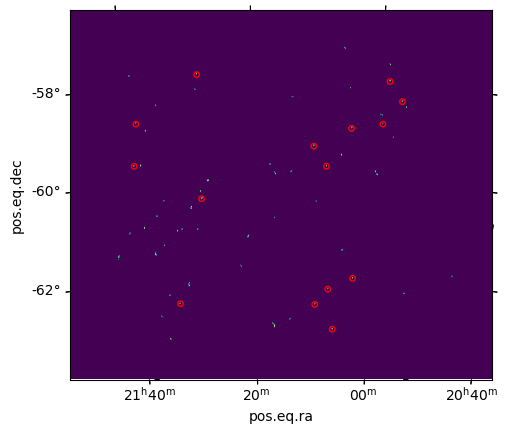

In [17]:
plt.subplot(projection=wcs, slices = ('x','y',0,0))
plt.imshow(np.squeeze(hdu.data), origin='lower')
ax=plt.gca()

for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=100, edgecolor='red', facecolor='none')
    ax.add_patch(circle)
    
plt.savefig('raw_54944.png' ,dpi = 1000, bbox_inches='tight') # save figure externally in png file
plt.show()

## highres_64249

In [18]:
cat = pd.read_csv("highres_64249.csv", skiprows = 5) #image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fit
cat.columns = cat.columns.str.strip()
circular_pos = cat["Min"]/cat["Maj"] > 0.6
circular_catalog = cat[circular_pos]
print(circular_catalog.shape)

RA = circular_catalog["RA"]
DEC =circular_catalog["DEC"]
print(RA, DEC)

(1, 45)
4    199.701771
Name: RA, dtype: float64 4    1.859135
Name: DEC, dtype: float64


In [19]:
filename = get_pkg_data_filename('highres_64249.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
wcs.wcs.specsys = 'TOPOCENT'
coord = wcs.wcs_world2pix(RA, DEC,0,0,0)
x,y = coord[0],coord[1]

  'HZ' -> 'Hz'. [astropy.wcs.wcs]


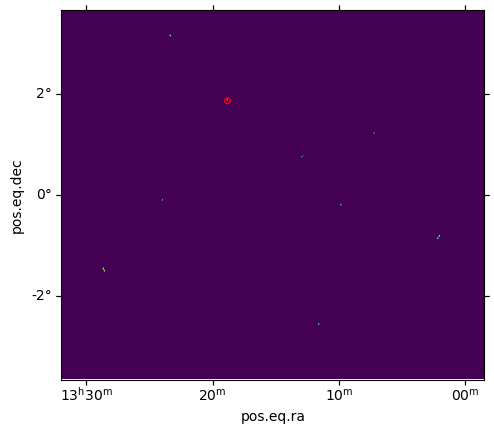

In [20]:
plt.subplot(projection=wcs, slices = ('x','y',0,0))
plt.imshow(np.squeeze(hdu.data), origin='lower') #np.squeeze to lower the NAXIS to 2
ax=plt.gca()

for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=100, edgecolor='red', facecolor='none')
    ax.add_patch(circle)
    
plt.savefig('highres_64249.png' ,dpi = 1000, bbox_inches='tight')
plt.show()

## conv_64249

In [21]:
cat = pd.read_csv("conv_64249.csv", skiprows = 5) #image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fit
cat.columns = cat.columns.str.strip()
circular_pos = cat["Min"]/cat["Maj"] > 0.6
circular_catalog = cat[circular_pos]
print(circular_catalog.shape)

RA = circular_catalog["RA"]
DEC =circular_catalog["DEC"]
print(RA, DEC)

(16, 45)
1     202.165731
3     201.909454
6     201.583117
13    201.174607
16    201.052149
23    200.111588
26    199.914947
35    199.238539
37    199.153151
40    198.910405
42    198.820729
48    198.188465
50    197.931894
63    196.912012
64    196.881588
72    195.244254
Name: RA, dtype: float64 1    -1.027362
3    -2.053185
6     2.101024
13   -0.792826
16   -1.271648
23    1.676702
26   -0.923592
35    0.417556
37    0.873785
40   -1.076508
42    2.372499
48   -2.433418
50   -1.326292
63   -0.942561
64   -0.562591
72   -0.028324
Name: DEC, dtype: float64


In [22]:
filename = get_pkg_data_filename('conv_64249.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
wcs.wcs.specsys = 'TOPOCENT'
coord = wcs.wcs_world2pix(RA, DEC,0,0,0)
x,y = coord[0],coord[1]

  'HZ' -> 'Hz'. [astropy.wcs.wcs]


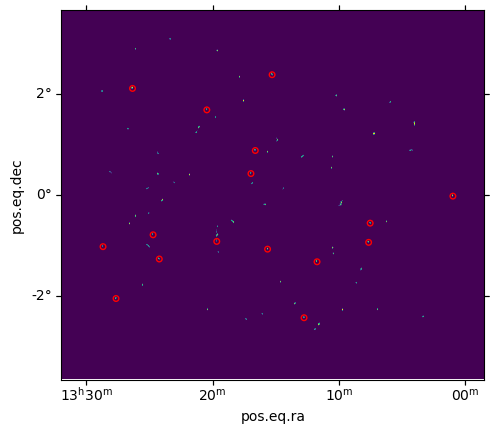

In [23]:
plt.subplot(projection=wcs, slices = ('x','y',0,0))
plt.imshow(np.squeeze(hdu.data), origin='lower') #np.squeeze to lower the NAXIS to 2
ax=plt.gca()

for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=100, edgecolor='red', facecolor='none')
    ax.add_patch(circle)
    
plt.savefig('conv_64249.png' ,dpi = 1000, bbox_inches='tight')
plt.show()

## raw_64249

In [24]:
cat = pd.read_csv("raw_64249.csv", skiprows = 5) #image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fit
cat.columns = cat.columns.str.strip()
circular_pos = cat["Min"]/cat["Maj"] > 0.6
circular_catalog = cat[circular_pos]
print(circular_catalog.shape)

RA = circular_catalog["RA"]
DEC =circular_catalog["DEC"]
print(RA, DEC)

(8, 45)
1     201.909415
3     201.584437
7     201.174576
10    201.051659
14    200.313163
16    200.111584
22    198.820701
33    195.244482
Name: RA, dtype: float64 1    -2.053230
3     2.102274
7    -0.792831
10   -1.271727
14    1.221413
16    1.676720
22    2.372351
33   -0.026236
Name: DEC, dtype: float64


In [25]:
filename = get_pkg_data_filename('raw_64249.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
wcs.wcs.specsys = 'TOPOCENT'
coord = wcs.wcs_world2pix(RA, DEC,0,0,0)
x,y = coord[0],coord[1]

  'HZ' -> 'Hz'. [astropy.wcs.wcs]


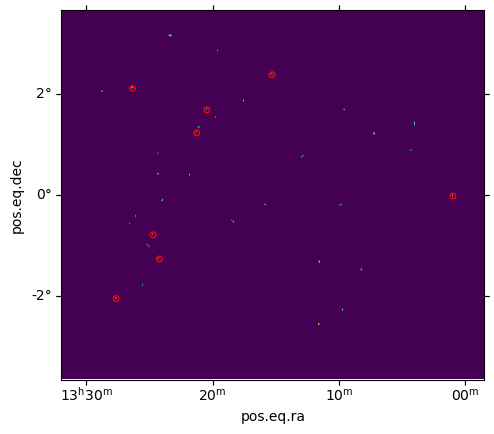

In [28]:
plt.subplot(projection=wcs, slices = ('x','y',0,0))
plt.imshow(np.squeeze(hdu.data), origin='lower') #np.squeeze to lower the NAXIS to 2
ax=plt.gca()

for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=100, edgecolor='red', facecolor='none')
    ax.add_patch(circle)
    
plt.savefig('raw_64249.png' ,dpi = 1000, bbox_inches='tight')
plt.show()

## highres_54944

In [29]:
cat = pd.read_csv("highres_54944.csv", skiprows = 5) #image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fit
cat.columns = cat.columns.str.strip()
circular_pos = cat["Min"]/cat["Maj"] > 0.6
circular_catalog = cat[circular_pos]
print(circular_catalog.shape)

RA = circular_catalog["RA"]
DEC =circular_catalog["DEC"]
print(RA, DEC)

(3, 45)
2    323.813304
4    322.158593
5    320.266807
Name: RA, dtype: float64 2   -62.071139
4   -60.370529
5   -61.190507
Name: DEC, dtype: float64


In [30]:
filename = get_pkg_data_filename('highres_54944.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
wcs.wcs.specsys = 'TOPOCENT'
coord = wcs.wcs_world2pix(RA, DEC,0,0,0)
x,y = coord[0],coord[1]

  'HZ' -> 'Hz'. [astropy.wcs.wcs]


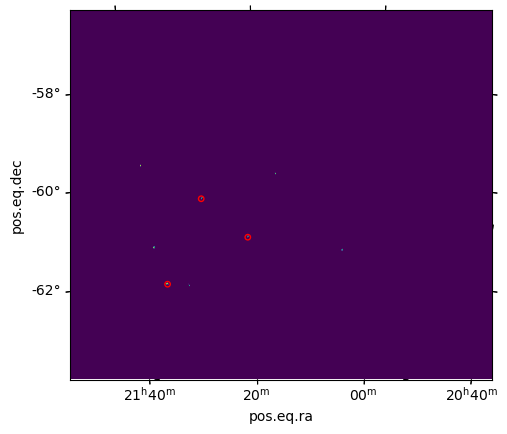

In [31]:
plt.subplot(projection=wcs, slices = ('x','y',0,0))
plt.imshow(np.squeeze(hdu.data), origin='lower') #np.squeeze to lower the NAXIS to 2
ax=plt.gca()

for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=100, edgecolor='red', facecolor='none')
    ax.add_patch(circle)
    
plt.savefig('highres_54944.png' ,dpi = 1000, bbox_inches='tight')
plt.show()

## conv_54944

In [34]:
cat = pd.read_csv("conv_54944.csv", skiprows = 5) #image.i.EMU_2115-60.SB54944.cont.taylor.0.restored.raw.fit
cat.columns = cat.columns.str.strip()
circular_pos = cat["Min"]/cat["Maj"] > 0.6
circular_catalog = cat[circular_pos]
print(circular_catalog.shape)

RA = circular_catalog["RA"]
DEC =circular_catalog["DEC"]
print(RA, DEC)

(42, 45)
9      324.800498
11     324.585873
21     324.206219
28     322.998427
30     322.902906
33     323.308152
37     322.585222
38     322.475385
43     322.097787
46     322.143418
49     321.718198
70     318.443205
74     318.364295
76     318.300078
79     317.856030
82     317.545158
83     317.393826
84     317.312405
85     317.362920
86     317.459684
90     317.125668
92     316.990914
93     317.048080
94     317.014449
95     316.806793
97     316.547232
100    316.493290
101    316.556234
110    316.062624
111    315.742766
112    315.198284
113    315.384268
115    314.894857
116    314.784837
119    314.622860
121    314.832406
122    314.656445
140    311.636338
145    312.124544
146    311.446046
147    312.035663
149    311.583264
Name: RA, dtype: float64 9     -59.614518
11    -58.757660
21    -62.672931
28    -57.486382
30    -58.381429
33    -62.487753
37    -59.257357
38    -58.965969
43    -57.831748
46    -60.370301
49    -57.968289
70    -60.386288
74    

In [35]:
filename = get_pkg_data_filename('conv_54944.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
wcs.wcs.specsys = 'TOPOCENT'
coord = wcs.wcs_world2pix(RA, DEC,0,0,0)
x,y = coord[0],coord[1]

  'HZ' -> 'Hz'. [astropy.wcs.wcs]


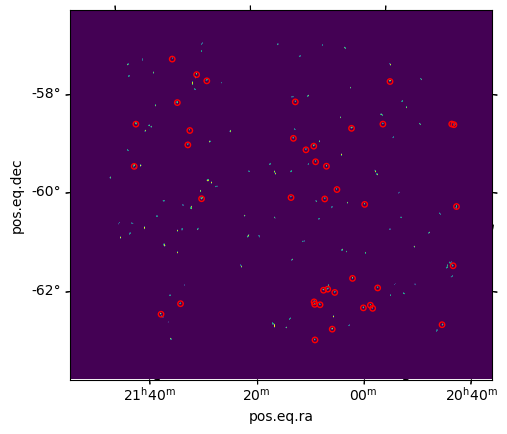

In [37]:
plt.subplot(projection=wcs, slices = ('x','y',0,0))
plt.imshow(np.squeeze(hdu.data), origin='lower') #np.squeeze to lower the NAXIS to 2
ax=plt.gca()

for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=100, edgecolor='red', facecolor='none')
    ax.add_patch(circle)
    
plt.savefig('conv_54944.pdf' ,dpi = 1000, bbox_inches='tight')
plt.show()